## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [131]:
# you code here
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random

#模拟数据
#num为初始化的条数
def iniinitlinerdata(num):
    def assmuing_function(paramx):
        return -20 * paramx + 5 + random.randint(-5, 5)

    random_data = np.random.random((num,1))
    x = random_data[:,0]#转换成一维数组
    #print(x)
    y = [assmuing_function(i) for i in x]

    return x,y

#使用scikit-learning进行线性回归
def linearreg(x,y):
    r = LinearRegression().fit(x.reshape(-1, 1), y)
    drawdot(x,y)#画点图
    drawline(x,r)#画点图
    return r

#画图
def drawdot(x,y,coler = 'yellow'):
    plt.scatter(x, y, c=coler)

def drawline(x,r):
    def f(x,r): 
        return r.coef_ * x + r.intercept_
    plt.plot(x, f(x,r), color='orange')

#预测
def linerregpredict(x,r):
    predicty = r.predict([[x]])
    plt.scatter(x,predicty,c='green')
    return predicty

In [132]:
#init linerreg data
X,Y = iniinitlinerdata(num = 50)

array([-7.11916128])

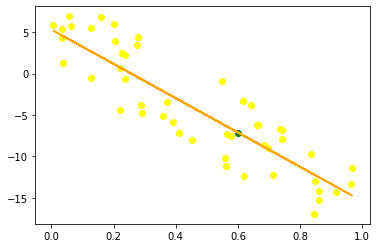

In [133]:
#线性回归
reg = linearreg(X,Y)
#初始点-黄色
#线性回归-橘色

#预测-绿色
linerregpredict(0.6,reg)

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

## cosine = 1 - $\frac{u \cdot v} {||u||_2 ||v||_2}$

In [134]:
# you code here
from scipy.spatial.distance import cosine

def knnmodel(x,y):
    return [(xi, yi) for xi, yi in zip(x, y)]

def distance(x1, x2):
    return cosine(x1, x2)

def knnpredict(predictx,x = X, y = Y, k=5):
    most_similars = sorted(knnmodel(x, y), key=lambda xi: distance(xi[0], predictx))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    predicty = np.mean(y_hats)
    drawdot(predictx,predicty,coler = 'green')
    return predicty

-4.5931347415711965

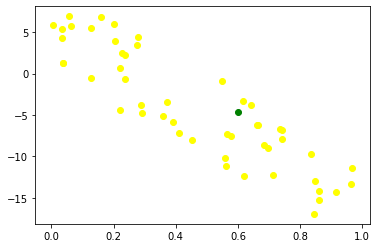

In [137]:
#画图
drawdot(X,Y)

#KNN预测
knnpredict(0.6)

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

In [311]:
#使用课堂数据测试，完后使用新数据
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [312]:
dataset = pd.DataFrame.from_dict(mock_data)

In [313]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [314]:
# you code here
import numpy as np
import pandas as pd
from icecream import ic
from collections import Counter

#信息熵
def entropy(elements):
    counter = Counter(elements)
    #计算每个set的概率
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

#找到信息熵最小的列
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        #ic(f)
        values = set(training_data[f])
        #ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_spliter_1)

            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v , min_entropy)
    
    #print('spliter is: {}'.format(spliter))
    #print('the min entropy is: {}'.format(min_entropy))
    return spliter

def getdecisiontree(training_data: pd.DataFrame, target: str):
    decisiontree = {}

    while 1 > 0:
        #查找
        (key, value, entropy) = find_the_optimal_spilter(training_data=training_data, target=target)
        decisiontree[key] = value
        #信息熵为0直接返回，找到最优解
        if(entropy == 0):
            break

        #获取新的dataset
        training_data = training_data[training_data[key] != value]
        #移除已经计算的列
        training_data = training_data.drop([key],axis=1)
        #如果已经没有可以移除的列，则跳出(此处判断需要排除target列))
        if(len(training_data.columns) == 1):
            break

    i = 0
    for k,v in decisiontree.items():
        i += 1
        print('第{0}次使用列 "{1}" = {2} 进行分割。'.format(i,k,v))
    return decisiontree

In [319]:
getdecisiontree(training_data=dataset, target='bought')

第1次使用列 "family_number" = 2 进行分割。
第2次使用列 "income" = -10 进行分割。
第3次使用列 "gender" = M 进行分割。


{'family_number': 2, 'income': '-10', 'gender': 'M'}

In [316]:
#创建新的数据源
mock_data1 = {
    'gender':['M', 'F', 'M', 'F', 'M', 'F', 'M'],
    '穿名牌': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    '成绩好': [1, 1, 0, 1, 0, 0, 0],
    '写作业': [1, 1, 0, 0, 0, 1, 0],
    '爱运动': [1, 0, 1, 1, 1, 0, 1],
    '上清华': [1, 0, 1, 0, 0, 1, 1],
}
ds = pd.DataFrame.from_dict(mock_data1)

In [317]:
ds

,gender,穿名牌,成绩好,写作业,爱运动,上清华
0,M,+10,1,1,1,1
1,F,-10,1,1,0,0
2,M,+10,0,0,1,1
3,F,+10,1,0,1,0
4,M,+10,0,0,1,0
5,F,+10,0,1,0,1
6,M,-10,0,0,1,1


In [318]:
getdecisiontree(training_data=ds, target='上清华')

第1次使用列 "成绩好" = 1 进行分割。
第2次使用列 "穿名牌" = -10 进行分割。
第3次使用列 "gender" = M 进行分割。
第4次使用列 "写作业" = 1 进行分割。


{'成绩好': 1, '穿名牌': '-10', 'gender': 'M', '写作业': 1}

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [350]:
# you code here
from sklearn.cluster import KMeans
from collections import defaultdict

#kmeans
def kmeansfit(types:int):
    if types > 8:
        raise RuntimeError('由于颜色原因支持8种分类')

    #初始化训练数据
    tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
    cluster = KMeans(n_clusters=types, max_iter=500).fit(tranning_data)

    dots = []

    #把所有点存入变量
    for label, location in zip(cluster.labels_, tranning_data):
        dots.append((location,label))

    color = ['red', 'green', 'grey', 'black', 'yellow', 'orange', 'blue', 'pink']

    #画出所有点
    for i in range(len(dots)):
        plt.scatter(*dots[i][0], c=color[dots[i][1]])

    #画出中心点，中心点比其他点要大
    for i in range(len(cluster.cluster_centers_)):
        plt.scatter(*cluster.cluster_centers_[i], s=200, c=color[i])

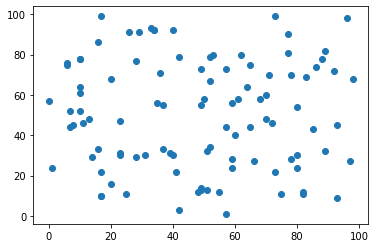

In [348]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

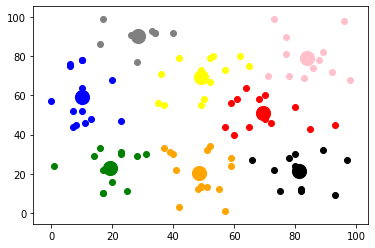

In [353]:
kmeansfit(types = 8)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [4]:
# you code here

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)